The purpose of this notebook is to explore the GDC TCGA gene expression data.

# Librairies

In [1]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)

import json
from setting import *
from download_data import *
from dataset import *
from plots_and_stats import *
from utils import *
from loader import *

set_pyplot()

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Path

In [33]:
name = 'KIRC'  # BRCA, KIRC
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

In [34]:
database = 'gdc'
label_name = 'sample_type.samples'
data = TCGA_dataset(data_path, database, name, label_name)

# Gene expression unit

The unit of gene expression is probably log2(raw count +1). It is mentioned [here](https://xenabrowser.net/datapages/?dataset=TCGA-KIRC.htseq_counts.tsv&host=https%3A%2F%2Fgdc.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443
).

### With or without scaling the total count to 100000

In [35]:
scale = True

info_X, info_y = get_X_y(data)
info_X = np.array(info_X)
info_y = np.array(info_y)
if scale:
    info_X = X = np.log2(scale_data(2**info_X-1, _type='sum', factor=10**6) + 1)

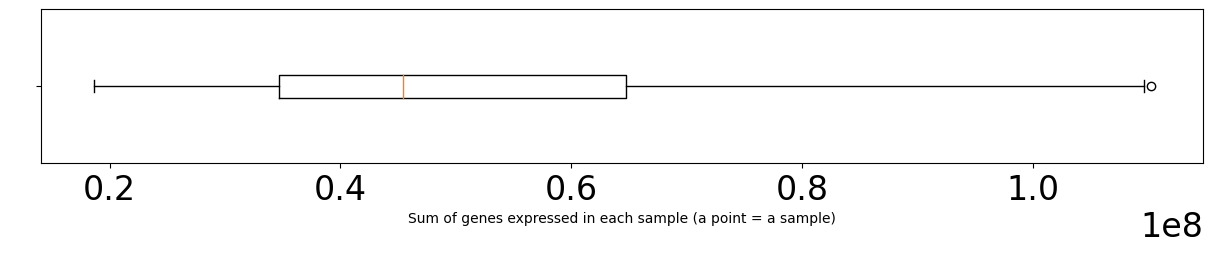

In [5]:
_sum = np.sum(2**info_X-1, axis=1)
plt.figure(figsize=(15, 2))
plt.boxplot(_sum, vert=False)
plt.yticks(color='w')
plt.xlabel('Sum of genes expressed in each sample (a point = a sample)', fontsize='10')
plt.show()

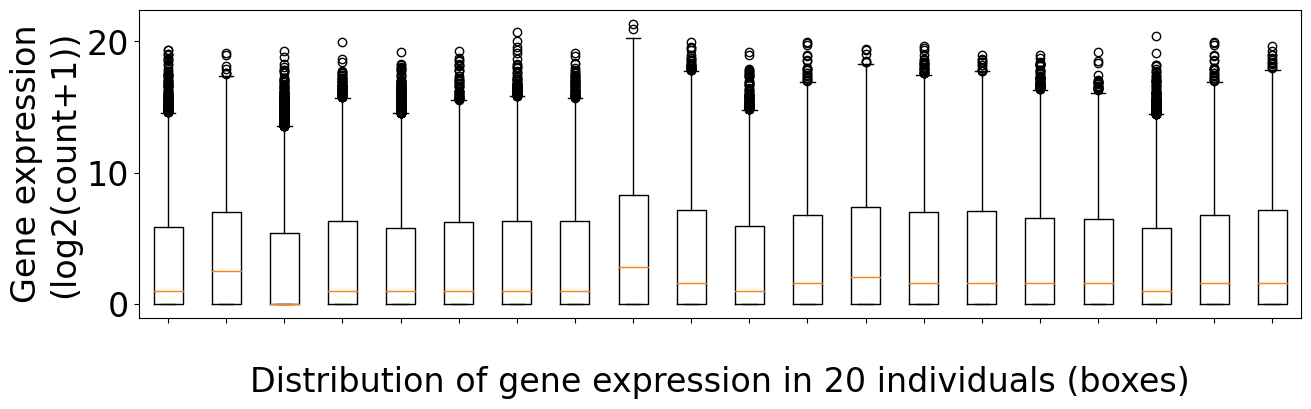

In [6]:
describe_random_individuals(data, log=False, scale=scale, log_scale=False, save_path=None, unit='log2(count+1)')

# Distribution of the values of gene expression

Mean:  3.43
Median:  1.0
Max:  22.4
Min:  0.0


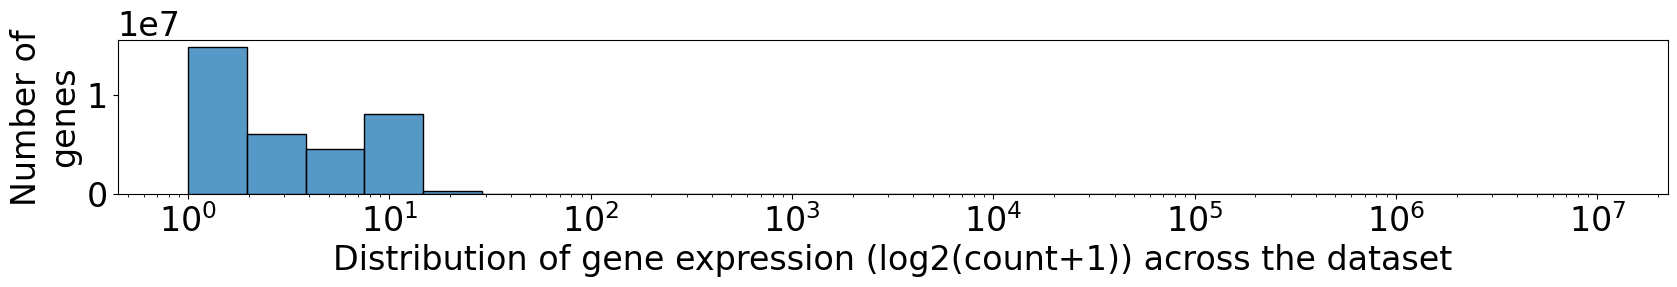

Below, the gene expressions are summed per individual.


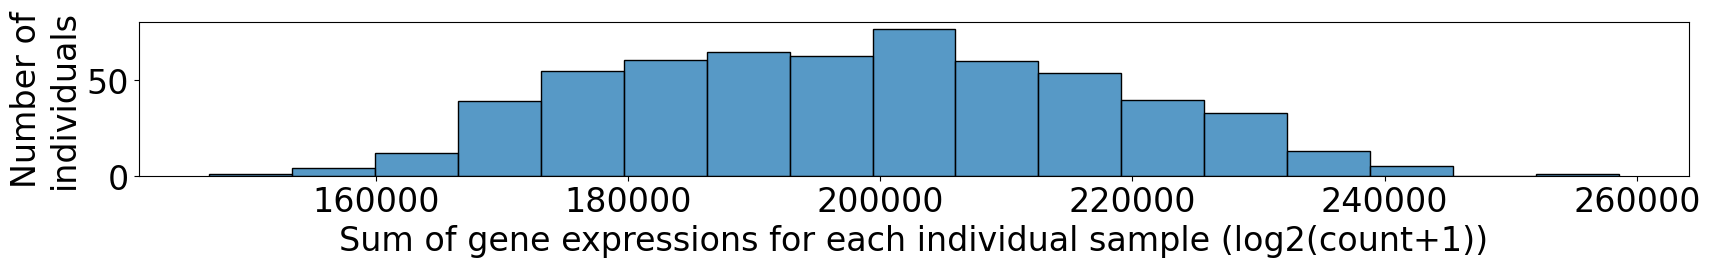

In [7]:
describe_gene_expression(data, unit='log2(count+1)', log=False, log_scale=False, scale=scale)

There are 3 genes whose average expression is 0.


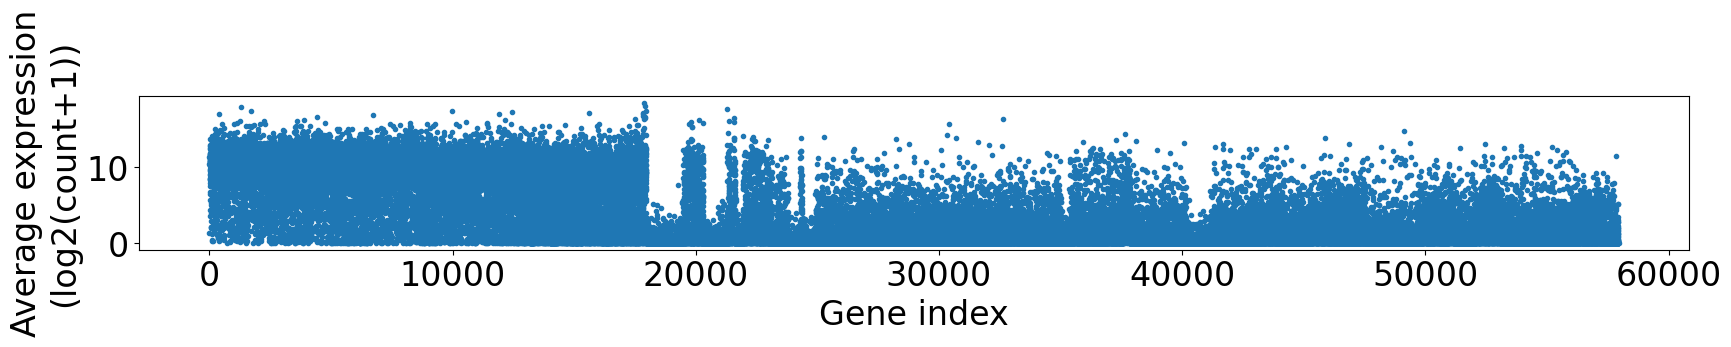

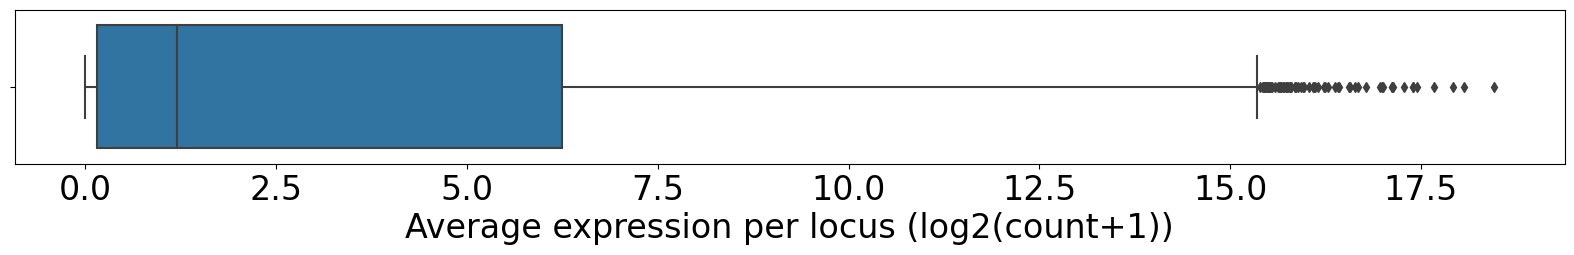

In [8]:
criteria = 'average'  # 'average', 'median', 'std', 'min', 'max'
plot_stats_on_gene_expression(data, criteria=criteria, log_scale=False, log=False, scale=scale, unit='log2(count+1)')

Some loci have very high average expression. This can be explained in two ways: they are always very active or they are extremely active in some cases. Or both. Let's check with the median.

There are 26344 genes whose median expression is 0.


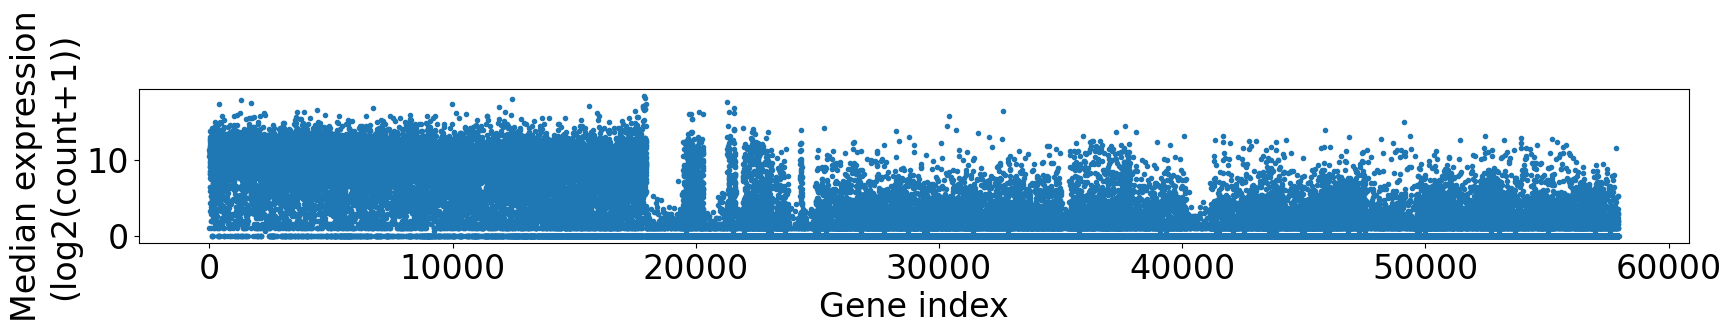

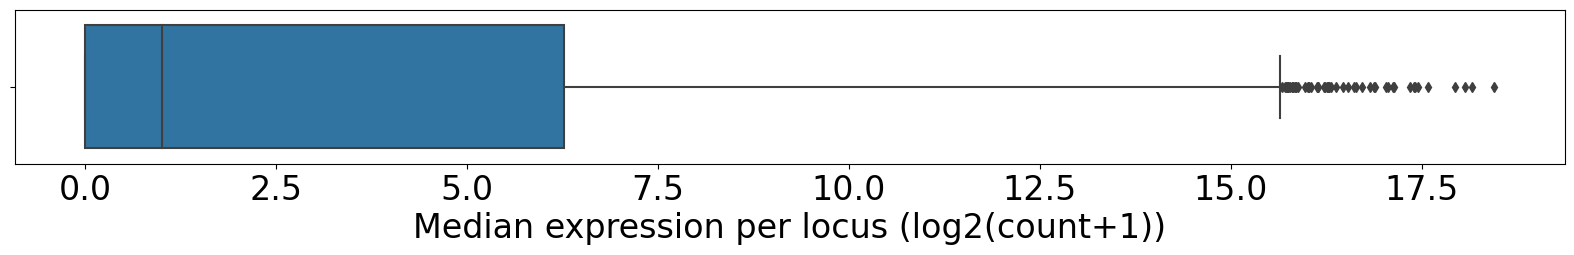

In [9]:
plot_stats_on_gene_expression(data, criteria='median', log_scale=False, log=False, scale=scale, unit='log2(count+1)')

Some genes have very high medians. They often are very active.

There are 3 genes whose maximum is 0.


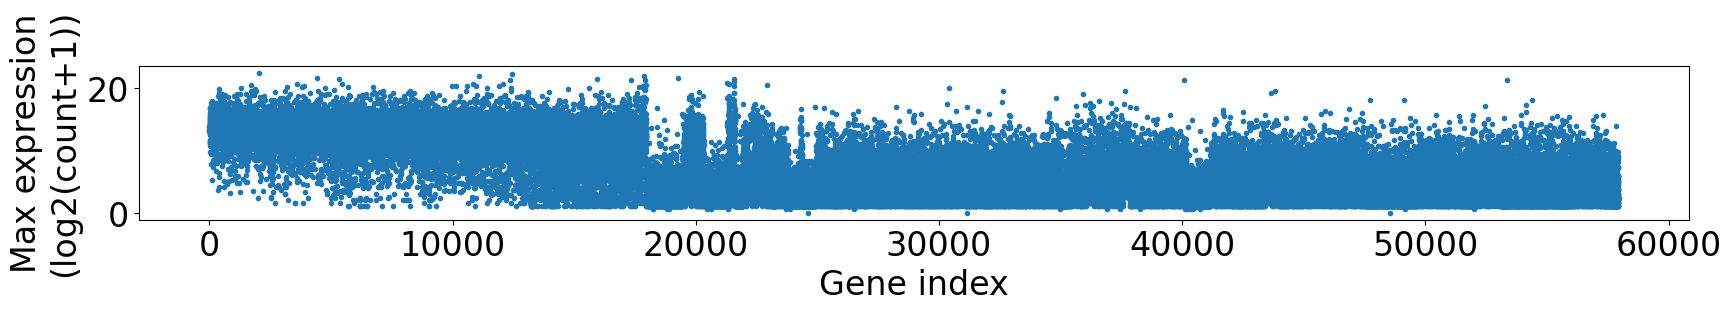

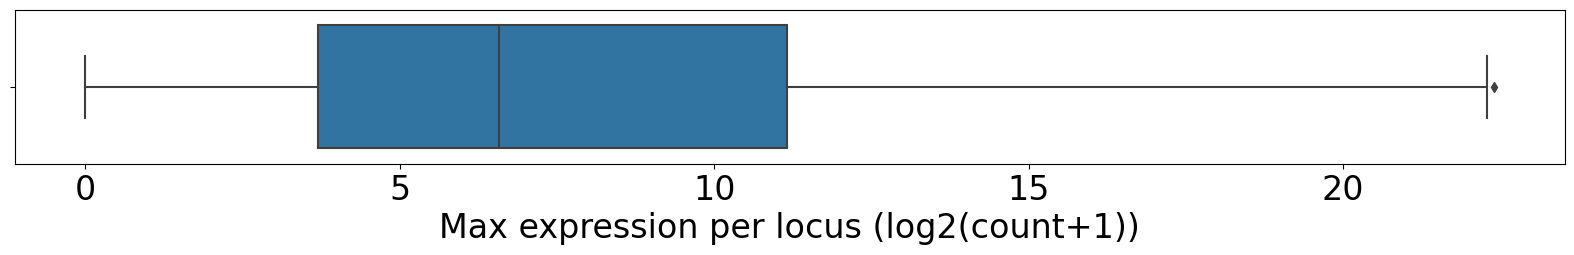

In [10]:
plot_stats_on_gene_expression(data, criteria='max', log_scale=False, log=False, scale=scale, unit='log2(count+1)')

Some genes are always expressed very weakly. Should we remove them?

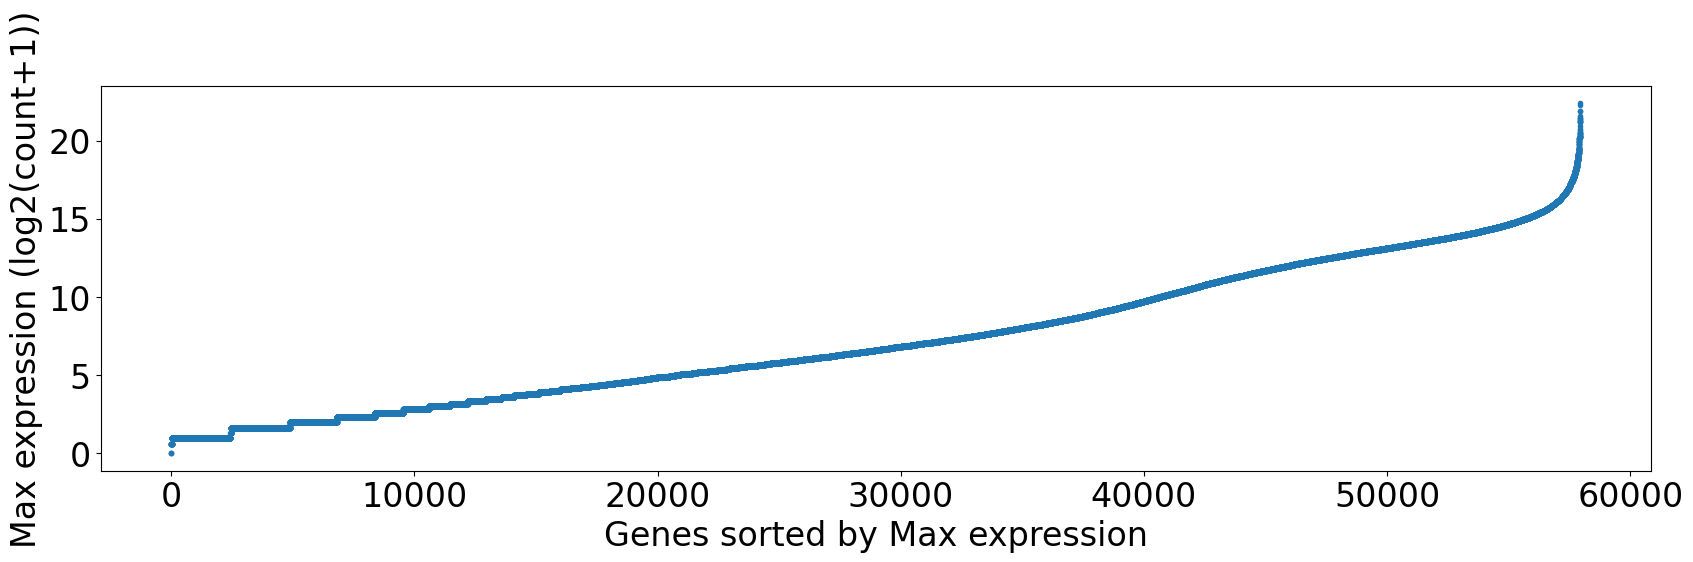

In [11]:
ordered_genes = sort_genes(data, criteria='max', scale=scale, unit='log2(count+1)') # 'average', 'median', 'std', 'min', 'max'

# Analysis by class

In [12]:
# Code to find the index of a gene from its name.
# np.argwhere(np.array([gene.split('|')[0] for gene in data.genes_IDs]) == 'ACPP')

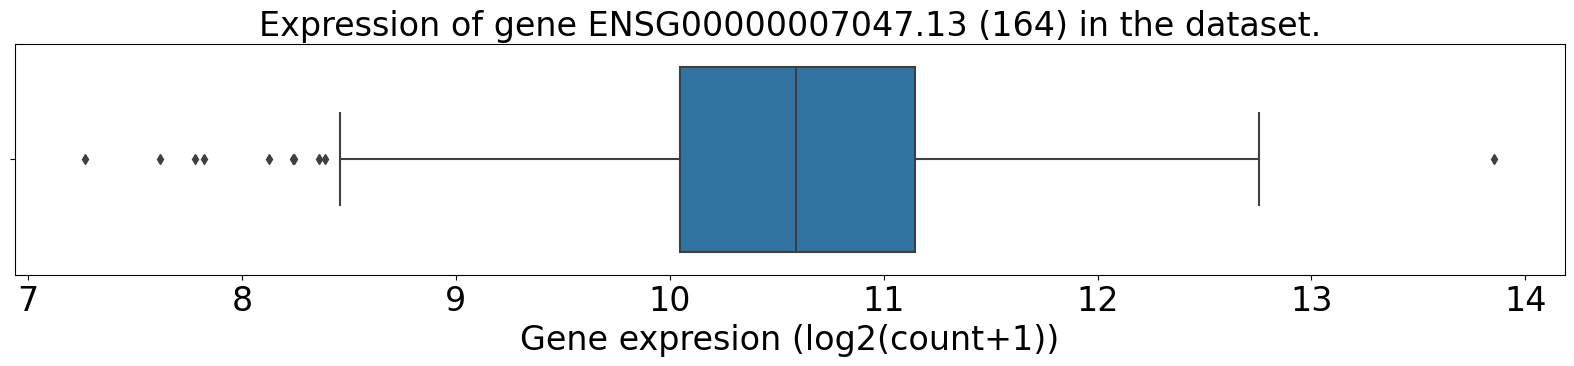

In [13]:
plot_random_gene_expression(data, group_by_classes=False, gene_index=164, log=False, scale=scale, unit='log2(count+1)')

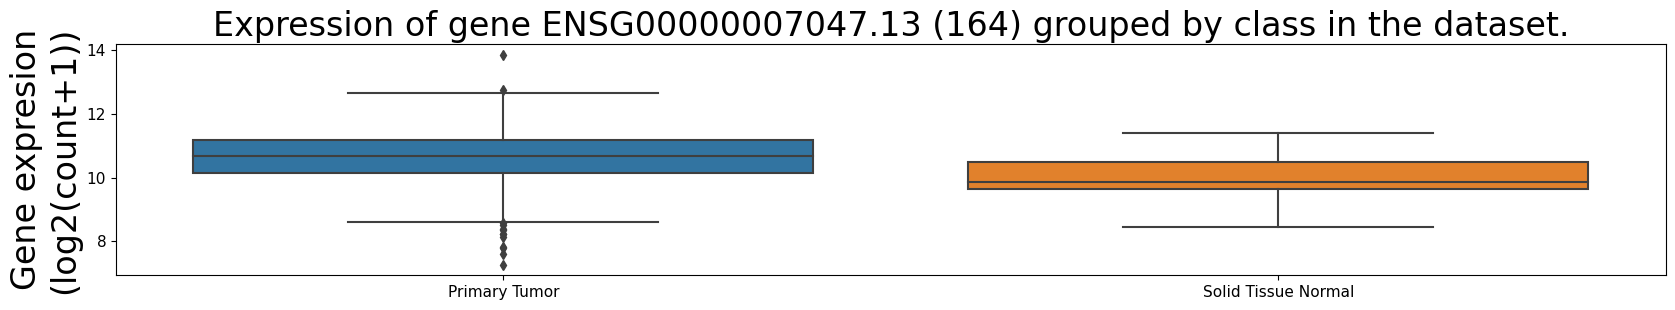

In [14]:
plot_random_gene_expression(data, group_by_classes=True, gene_index=164, log=False, scale=scale, unit='log2(count+1)')

In [15]:
# Code to find the index of a gene from its name.
# np.argwhere(np.array(data.genes_IDs) == 'ENSG00000000003.13')

# Analysis by sample

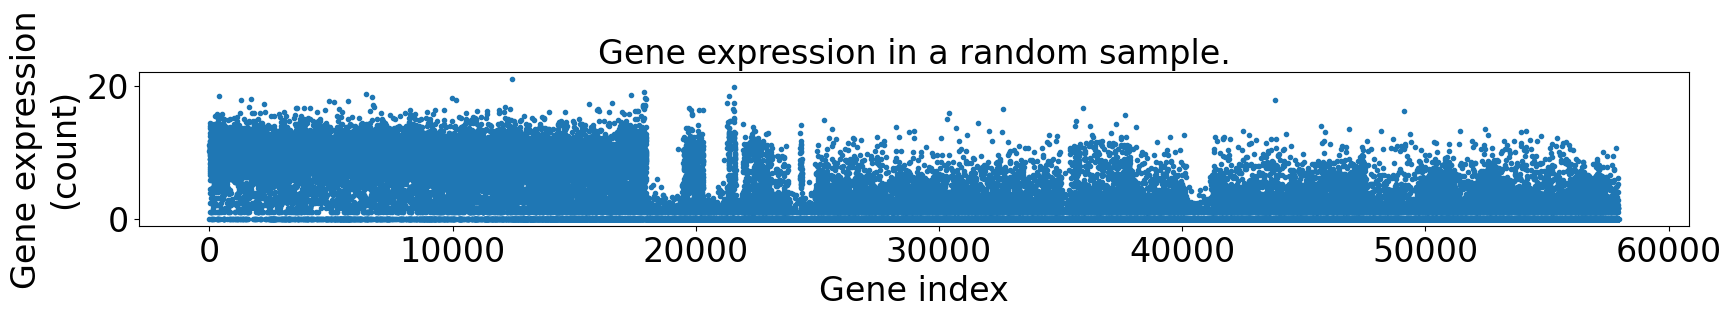

In [16]:
plot_random_sample_expression(data, index=27, scale=scale)

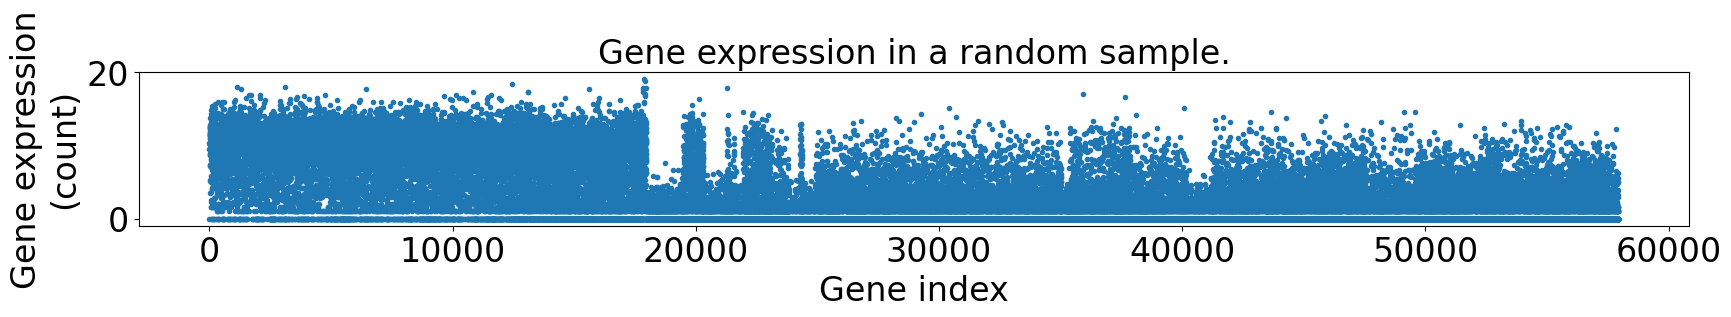

In [17]:
plot_random_sample_expression(data, index=31, scale=scale)